In [16]:
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.service import Service
from selenium import webdriver
from bs4 import BeautifulSoup
import os

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager,rc
from datetime import datetime
import time
import pandas as pd

from IPython import display

font_location = "C:\Windows\Fonts\malgun.ttf"
font_name = font_manager.FontProperties(fname=font_location).get_name()
rc('font',family=font_name)
plt.rcParams['axes.unicode_minus'] = False

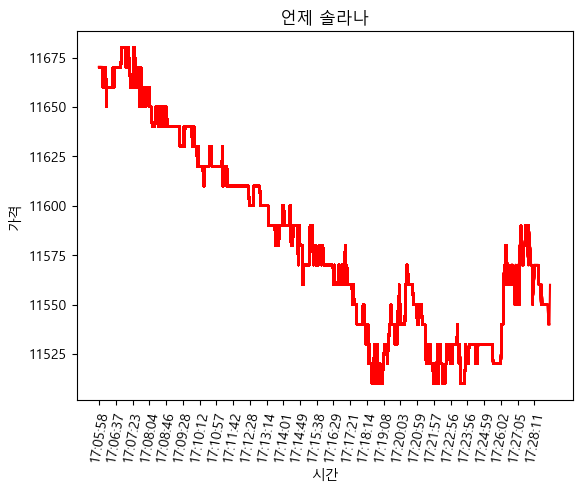

NoSuchWindowException: Message: no such window: target window already closed
from unknown error: web view not found
  (Session info: chrome=108.0.5359.125)
Stacktrace:
Backtrace:
	(No symbol) [0x0024F243]
	(No symbol) [0x001D7FD1]
	(No symbol) [0x000CD04D]
	(No symbol) [0x000B2D7A]
	(No symbol) [0x0011BE7B]
	(No symbol) [0x0012C196]
	(No symbol) [0x00118386]
	(No symbol) [0x000F163C]
	(No symbol) [0x000F269D]
	GetHandleVerifier [0x004E9A22+2655074]
	GetHandleVerifier [0x004DCA24+2601828]
	GetHandleVerifier [0x002F8C0A+619850]
	GetHandleVerifier [0x002F7830+614768]
	(No symbol) [0x001E05FC]
	(No symbol) [0x001E5968]
	(No symbol) [0x001E5A55]
	(No symbol) [0x001F051B]
	BaseThreadInitThunk [0x75C000F9+25]
	RtlGetAppContainerNamedObjectPath [0x77387BBE+286]
	RtlGetAppContainerNamedObjectPath [0x77387B8E+238]
	(No symbol) [0x00000000]


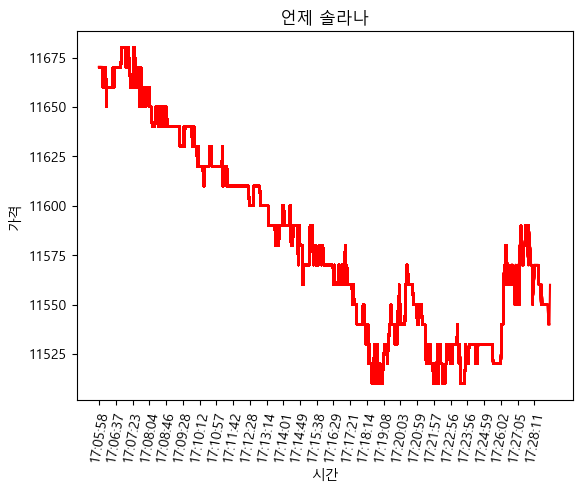

In [19]:
url = 'https://upbit.com/exchange?code=CRIX.UPBIT.KRW-SOL'
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
driver.maximize_window()
driver.implicitly_wait(3) 

#     URL 접근
driver.get(url)
driver.implicitly_wait(10)

df = pd.DataFrame(columns={'시간','가격'})

fig,ax = plt.subplots(1,1)
plt.xticks(rotation=80)
hdisplay = display.display("", display_id=True)

ax.set_xlabel('시간')
ax.set_ylabel('가격')
ax.set_title("언제 솔라나")

t = 0
tick = []
while True :
    html = driver.page_source
    
    soup=BeautifulSoup(html,'html.parser')
    a = soup.select_one("span.first strong").string
    a = a.replace(',','')
    a = int(a)
    
    now = datetime.now()
    df2 = pd.DataFrame({'시간' : [now.strftime('%H:%M:%S')] , '가격' : [a]})
    df = pd.concat([df, df2], ignore_index = True )

    if t % 30 == 0 :
        tick.append(t)
        
    plt.xticks(tick)
    ax.plot(df['시간'],df['가격'], color='r')
    
    hdisplay.update(fig)
    t += 1
    time.sleep(1)

In [ ]:
soup.tbody